# Develop a program to load a database. Select one numerical column. Compute mean, median, mode, standard deviation, variance, and range for the given numerical column in dataset. Generate histogram and box plot to understand the distribution of data. Identify any outlayer in data using the IQR, select the categorical variable from the dataset. Next, compute the frequency of each category and display it as bar or pie chart.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
num_col ='Fare'

In [9]:
# Compute statistical measures
mean_value = df[num_col].mean()
median_value = df[num_col].median()
mode_value = df[num_col].mode()[0]
std_dev = df[num_col].std()
variance = df[num_col].var()
data_range = df[num_col].max() - df[num_col].min()

In [10]:
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {data_range}")

Mean: 32.204207968574636
Median: 14.4542
Mode: 8.05
Standard Deviation: 49.693428597180905
Variance: 2469.436845743117
Range: 512.3292


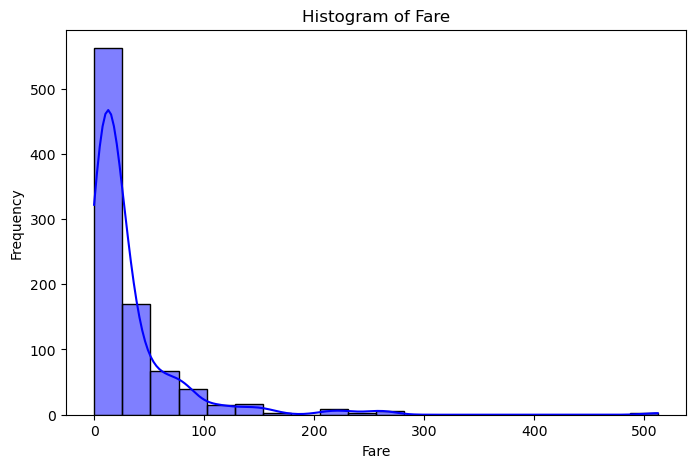

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df[num_col], bins=20, kde=True, color="blue")
plt.title(f"Histogram of {num_col}")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()

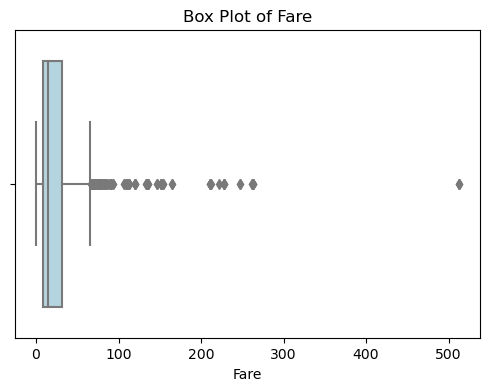

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[num_col], color="lightblue")
plt.title(f"Box Plot of {num_col}")
plt.show()

In [13]:
Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [14]:
outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]
print("\nOutliers detected:")
print(outliers[num_col ])


Outliers detected:
1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64


In [15]:
cat_col = "Survived" 

In [16]:
category_counts = df[cat_col].value_counts()

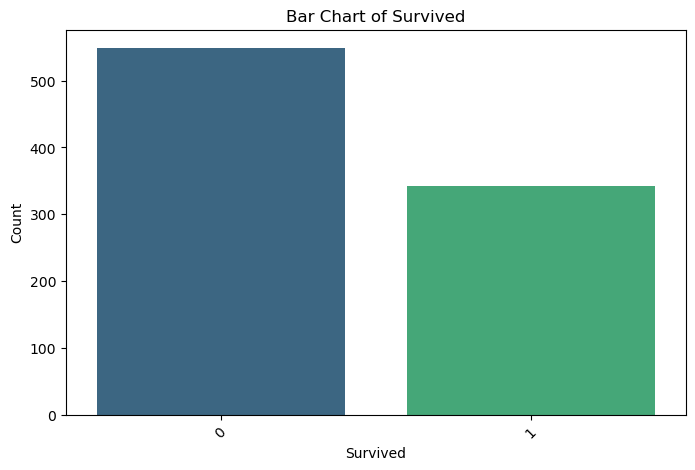

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title(f"Bar Chart of {cat_col}")
plt.xlabel(cat_col)
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


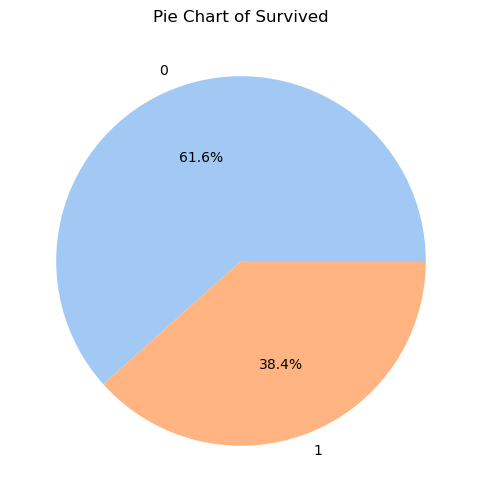

In [18]:
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title(f"Pie Chart of {cat_col}")
plt.show()